In [21]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [22]:
diabetes = datasets.load_diabetes()
X = diabetes.data[:, np.newaxis, 2]
X_train = X[:-30]
X_test = X[-30:]
y_train = diabetes.target[:-30]
y_test = diabetes.target[-30:]

In [23]:
regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)

In [24]:
print('Coefficients: \n', regr.coef_)
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
print('Variance score: %.2f' % r2_score(y_test, y_pred))

Coefficients: 
 [941.43097333]
Mean squared error: 3035.06
Variance score: 0.41


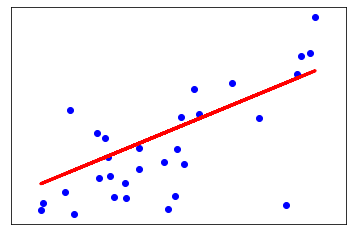

In [25]:
plt.scatter(X_test, y_test, color = 'blue')
plt.plot(X_test, y_pred, color = 'red', linewidth = 3)
plt.xticks(())
plt.yticks(())
plt.show()

In [38]:
import pandas as pd
df=pd.DataFrame(X)
df.head()

,0
0,0.061696
1,-0.051474
2,0.044451
3,-0.011595
4,-0.036385


In [44]:
#Boston House Price
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split


In [45]:
boston = load_boston()
boston_df = pd.DataFrame(boston.data, columns=boston.feature_names)
boston_df['Price'] = boston.target
boston_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [46]:
x = boston.data
y = boston.target
x_train, x_test ,y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state=42)

In [48]:
reg = linear_model.LinearRegression()
reg.fit(x_train, y_train)
y_pred = reg.predict(x_test)


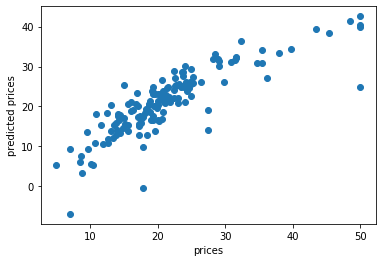

In [49]:
plt.scatter(y_test, y_pred)
plt.plot()
plt.xlabel('prices')
plt.ylabel('predicted prices')
plt.show()


In [50]:
mse = mean_squared_error(y_test, y_pred)
mse

21.517444231176995

In [51]:
#K-fold cross-validation
# find important features

In [53]:
from sklearn.model_selection import cross_val_score
reg = linear_model.LinearRegression()
first_cv_scores = cross_val_score(reg, x, y, cv=5)
second_cv_scores = cross_val_score(reg, x, y, cv=10)
print('mean in first_cv_scores is {0:.2f} and in second_cv_scores is {1:.2f}'.format(np
.mean(first_cv_scores), np.mean(second_cv_scores)) )


mean in first_cv_scores is 0.35 and in second_cv_scores is 0.20


[-0.          0.         -0.          0.         -0.          2.95469455
 -0.          0.         -0.         -0.         -0.24795837  0.
 -0.42817439]


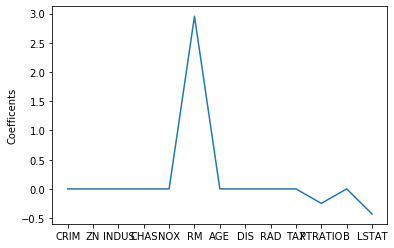

In [54]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=0.1, normalize=True)
lasso.fit(x, y)
lasso_coef = lasso.coef_
print(lasso_coef)
plt.plot(range(13), lasso_coef)
plt.xticks(range(13), boston.feature_names)
plt.ylabel('Coefficents')
plt.show()


In [56]:
from sklearn.linear_model import Ridge
x = boston.data
y = boston.target
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
ridge = Ridge(alpha=0.1, normalize=True)
ridge.fit(x_train, y_train)
ridge_pred = ridge.predict(x_test)